# \<Story\> (title to be decided)

In [21]:
import pandas as pd
import plotly.graph_objs as go
import plotly.express as px

In [31]:
#px.bar(df.where(df['Area'] == 'World' ),x = 'Area', y = '2000')
df: pd.DataFrame = pd.read_csv('../datasets/emissions.csv')
where = df.where((df['Area'] == 'World') & (df['Element'] == 'Emissions (CO2)') &  (df['Item'] == 'Energy')).dropna().transpose()[4:].reset_index().rename(columns={'index': 'Year', 50837: 'Emissions'})
fig = px.line(where, x='Year', y='Emissions')
fig.update_layout(title='CO2 Emissions worldwide from 2000 to 2020', xaxis_title='Year', yaxis_title='CO2 Emissions (in Kilotonnes)')
fig.show()

> *Figure 1: Shows the total CO2 emissions of the entire world from 2000 to 2020.*

\<Story inleiding komt hier, met verwijzing naar de grafiek over hoe klimaatverandering een steeds groter wordend probleem is etc.\>

## The First Perspective

The different kinds of sustainable energy per country affect the emissions in that country so that there are less emissions. It wins back renewable energy in a sustainable way so that there is less need to obtain energy causing bad emissions. So there will be a positive correlation between sustainable energy and lessening the emissions per country.

### The First Argument of Your First Perspective

<head>
    <style>
        .scrollable-container {
            max-width: 100%; /* Adjust based on your layout needs */
            overflow-x: auto; /* Enables horizontal scrolling */
            border: 1px solid #ccc; /* Optional: adds a border around the container */
        }
    </style>
</head>
<div class="scrollable-container">

In [24]:
df = pd.read_csv('../datasets/sus.csv')

df_orig = df[df["Year"] == 2020]

df = df_orig[df_orig["Entity"].isin(["Central African Republic", "Chad", "Niger", "Somalia", "Mali", "Mauritania", "Congo", "Namibia", "Afghanistan", "Zambia"])]

dfg = df_orig[df_orig["Entity"].isin(["Singapore", "Bahrain", "Trinidad and Tobago", "Aruba", "Malta", "Qatar", "Kuwait", "Netherlands", "Luxembourg", "Belgium"])]

# Good countries
trace1 = go.Bar(
    x = df['Entity'],
    y = df['Electricity from fossil fuels (TWh)'],
    name='Fossil Fuels',
    text = df['Electricity from fossil fuels (TWh)'],
)

trace2 = go.Bar(
    x = df['Entity'],
    y = df['Electricity from nuclear (TWh)'],
    name='Nuclear',
    text = df['Electricity from nuclear (TWh)'],
)

trace3 = go.Bar(
    x = df['Entity'],
    y = df['Electricity from renewables (TWh)'],
    name='Renewables',
    text = df['Electricity from renewables (TWh)'],
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=go.Layout(barmode='stack', font_size = 14,
                                                                title= "Electricity from sources (in TWh) of top 10 countries with least emissions in 2020")).show()

# Good countries
trace1 = go.Bar(
    x = dfg['Entity'],
    y = dfg['Electricity from fossil fuels (TWh)'],
    name='Fossil Fuels',
    text = dfg['Electricity from fossil fuels (TWh)'],
)

trace2 = go.Bar(
    x = dfg['Entity'],
    y = dfg['Electricity from nuclear (TWh)'],
    name='Nuclear',
    text = dfg['Electricity from nuclear (TWh)'],
)

trace3 = go.Bar(
    x = dfg['Entity'],
    y = dfg['Electricity from renewables (TWh)'],
    name='Renewables',
    text = dfg['Electricity from renewables (TWh)'],
)
fig = go.Figure(data=[trace1, trace2, trace3], layout=go.Layout(barmode='stack', font_size = 14,
                                                                title= "Electricity from sources (in TWh) of top 10 countries with most emissions in 2020")).show()

> *Figure 2: Electricity obtained from renewables, nuclear and fossil fuels for countries with the least and most emissions in 2020.*

Figure 2 shows countries with the least amount of emissions do gain some of their electricity through renewable sources. This could mean the sustainability of it has a positive effect on lowering the emissions. They also have less electricity from fossil fuels than the countries with most emissions. 

Even though two of the countries that have most emissions have a relatively high amount of electricity through renewables and nuclear sources, the emissions can be explained because of the high amount of electricity gained from fossil fuels which increase the emissions. The renewables could still help out to lower the emissions but is being overshadowed by the large amount of electricity from fossil fuels. This theory came to life when comparing Singapore from figure 1 with figure 2, because Singapore has the most emissions taking in consideration the land area in figure 1 and it shows to have a lot of electricity gained from fossil fuels in figure 2.

### The Second Argument of Your First Perspective

In [ ]:
# Sort by 'total_CO' (or any other initial sort criteria) and select the top 10
merge = pd.read_csv('../graphs/graphA/merge.csv')
years = ['2000', '2010', '2015', '2020']
# LULUCF filter:
# Removes all rows with 'All sectors with LULUCF' in the 'Item' column
merge = merge[merge['Item'] != 'All sectors with LULUCF']

# Calculate the average of the relative values for each country
merge['avg_total'] = merge[[year for year in years]].mean(axis=1)

# Sort by the average
total_sort = merge.sort_values('avg_total', ascending=False)

# Create a new Figure
fig = go.Figure()

for year in years:
    fig.add_trace(go.Bar(
        x=total_sort['Area'],
        y=total_sort[year],
        name=year,
        width=0.2,
    ))


# Change the bar mode to group
fig.update_layout(barmode='group')

# Add labels and title
fig.update_layout(
    title='Emissions per Country for Selected Categories',
    xaxis_title='',
    yaxis_title=''
)

# Define dropdown menus for switching categories
fig.update_layout(
    updatemenus=[
        dict(
            buttons=[
                dict(label="CO2 Emissions (in kilotons)",
                     method="update",
                     args=[{"y": [total_sort[year] for year in years]}]),
                dict(label="CO2 Emissions per Area (in kilotons per km²)",
                     method="update",
                     args=[{"y": [total_sort[year+'/area'] for year in years]}]),
                dict(label="CO2 Emissions per Capita (in kilotons per person)",
                     method="update",
                     args=[{"y": [total_sort[year+'/pop'] for year in years]}])
            ],
            direction="up",
            pad={"r": 10, "t": 10},
            showactive=True,
            x=0,
            xanchor="left",
            y=-0.8,
            yanchor="bottom"
        ),
    ],
    width=6000,
    bargroupgap=1,
    legend=dict(x=-0.02, y=1, xanchor='left', yanchor='top'),
)

# Show the plot
fig.show()


</div>

> *Figure 3: Shows the CO2 emissions per country, in total, per km² and per person.*

C:\Users\pjhoor\AppData\Local\Temp\ipykernel_9260\3426702579.py:11: FutureWarning:

The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.



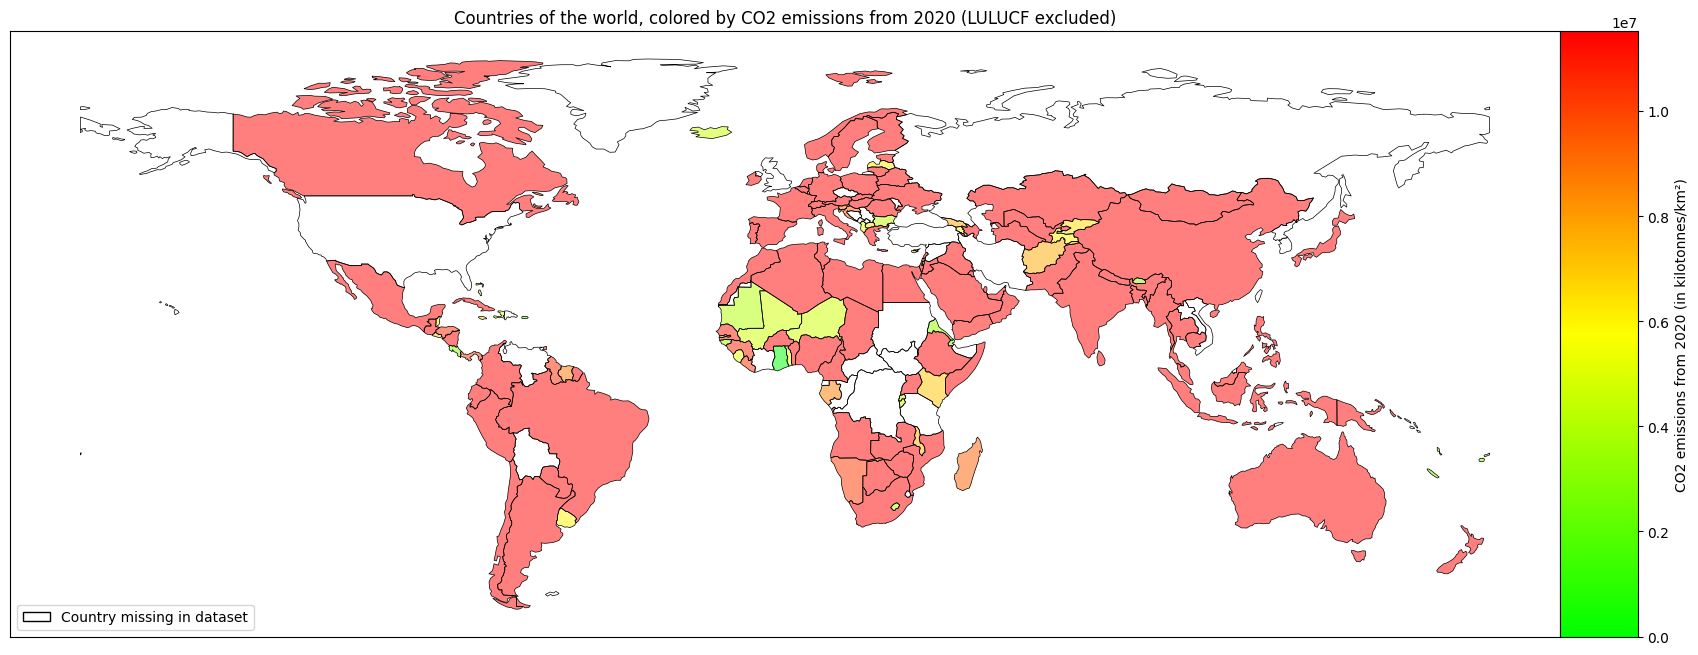

In [33]:
import pandas as pd
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import seaborn as sns
import geopandas as gpd

ems_2020_rel = pd.read_csv('../graphs/graphA/merge.csv', usecols=['Area','2020','2020/area','2020/pop'])

world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

# initialize a final empty figure
fig, ax = plt.subplots(figsize=(20, 10))

# drop "Antarctica" and "Seven seas" from the dataframe
drop_idxs = world["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world = world.drop(world[drop_idxs].index)

# start by plotting a map of the world
world.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)

# Define a custom colormap
cmap = mcolors.LinearSegmentedColormap.from_list(
    "custom",
    [(0, 1, 0), (1, 1, 0), (1, 0, 0)],
    N=256
)

# normalize the '2020' values to the range [0, 1] for the colormap
norm = plt.Normalize(ems_2020_rel['2020'].min(), ems_2020_rel['2020'].median())

# loop over the countries in the world dataframe
for country_name in world["name"].unique():
    # grab all countries that belong to the continent
    country = world[world["name"] == country_name]

    # check if the country is in the ems_2020_rel dataframe
    if country_name in ems_2020_rel['Area'].values:
        # get the '2020' value for the country
        rel_value = ems_2020_rel[ems_2020_rel['Area'] == country_name]['2020'].values[0]

        # get the color corresponding to the '2020' value
        color = cmap(norm(rel_value))
    else:
        # if the country is not in the ems_2020_rel dataframe, use white color
        color = 'white'

    # plot the country with the color
    country.plot(ax=ax, color=color, alpha=0.5)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title and subtitle
plt.title("Countries of the world, colored by CO2 emissions from 2020 (LULUCF excluded)")


# create a ScalarMappable for the colorbar with unnormalized values
norm_cbar = plt.Normalize(ems_2020_rel['2020'].min(), ems_2020_rel['2020'].max())
sm_cbar = plt.cm.ScalarMappable(cmap=cmap, norm=norm_cbar)
sm_cbar.set_array([])
cbar = fig.colorbar(sm_cbar, orientation="vertical", fraction=0.036, pad=0.1, aspect = 30, cax=ax.inset_axes([1.0, 0, 0.05, 1]))

cbar.set_label("CO2 emissions from 2020 (in kilotonnes/km²)")

# create custom legend
patch1 = mpatches.Patch(facecolor=(1, 1, 1), edgecolor='black', label='Country missing in dataset')
plt.legend(handles=[patch1], loc='lower left')

plt.show()


> *Figure 2: Countries of the world, colored by CO2 emissions from 2020.*

As you can see, most small countries are in the red, which means that their CO2 emissions per square kilometer are very high.


## Your Second Perspective

### The First Argument of Your Second Perspective

If you look figure 2, two of these countries get loads of energy from renewable sources, yet they are still in the top 10 most emitting countries.

In [ ]:
developed_countries = [
    "Australia",
    "Austria",
    "Belgium",
    "Canada",
    "Denmark",
    "Finland",
    "France",
    "Germany",
    "Iceland",
    "Ireland",
    "Israel",
    "Italy",
    "Japan",
    "Luxembourg",
    "Netherlands",
    "New Zealand",
    "Norway",
    "Portugal",
    "Singapore",
    "South Korea",
    "Spain",
    "Sweden",
    "Switzerland",
    "United Kingdom",
    "United States",
    "Andorra",
    "Cyprus",
    "Czech Republic",
    "Estonia",
    "Greece",
    "Hong Kong SAR",
    "Latvia",
    "Lithuania",
    "Malta",
    "Monaco",
    "San Marino",
    "Slovakia",
    "Slovenia"
]
df = pd.read_csv("../graphs/merged_to_csv")
countries = pd.read_csv('../datasets/sus.csv')['Entity'].drop_duplicates()
world_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (df['Area'].isin(countries))].drop(columns=['Item', 'Element', 'Unit', 'Entity', 'Access to electricity (% of population)', 'Access to clean fuels for cooking', 'Renewable-electricity-generating-capacity-per-capita', 'Financial flows to developing countries (US $)', 'Financial flows to developing countries (US $)', 'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)', 'Electricity from renewables (TWh)','Low-carbon electricity (% electricity)', 'Primary energy consumption per capita (kWh/person)', 'Energy intensity level of primary energy (MJ/$2017 PPP GDP)', 'Value_co2_emissions_kt_by_country', 'Renewables (% equivalent primary energy)','gdp_growth', 'gdp_per_capita', 'Density\\n(P/Km2)','Land Area(Km2)', 'Latitude', 'Longitude']).dropna()

means = pd.concat([world_data['Renewable energy share in the total final energy consumption (%)'].groupby(world_data['Year']).mean(), world_data['Emission'].groupby(world_data['Year']).sum()], axis=1)
means
"""import plotly.express as px
import plotly.graph_objects as go
"""
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=means.index, y=means['Emission'], name="Emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=means.index, y=means['Renewable energy share in the total final energy consumption (%)'], name="Renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="World average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Renewable energy share (%)</b>", secondary_y=True)

fig.show()

In [ ]:
developed_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (df['Area'].isin(developed_countries))].drop(columns=['Item', 'Element', 'Unit','Entity', 'Access to electricity (% of population)','Access to clean fuels for cooking','Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Low-carbon electricity (% electricity)','Primary energy consumption per capita (kWh/person)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)','Value_co2_emissions_kt_by_country','Renewables (% equivalent primary energy)', 'gdp_growth','gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude','Longitude'])

developed_means = pd.concat([developed_data['Renewable energy share in the total final energy consumption (%)'].groupby(developed_data['Year']).mean(), developed_data['Emission'].groupby(developed_data['Year']).sum()], axis=1)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=developed_means.index, y=developed_means['Emission'], name="Developed emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=developed_means.index, y=developed_means['Renewable energy share in the total final energy consumption (%)'], name="Developed renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Developed world average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Renewable energy share (%)</b>", secondary_y=True)

fig.show()

In [ ]:
developing_data = df[(df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (~df['Area'].isin(developed_countries))].drop(columns=['Item', 'Element', 'Unit','Entity', 'Access to electricity (% of population)','Access to clean fuels for cooking','Renewable-electricity-generating-capacity-per-capita','Financial flows to developing countries (US $)','Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)','Electricity from renewables (TWh)','Low-carbon electricity (% electricity)','Primary energy consumption per capita (kWh/person)','Energy intensity level of primary energy (MJ/$2017 PPP GDP)','Value_co2_emissions_kt_by_country','Renewables (% equivalent primary energy)', 'gdp_growth','gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude','Longitude']).dropna()
developing_means = pd.concat([developing_data['Renewable energy share in the total final energy consumption (%)'].groupby(developing_data['Year']).mean(), developing_data['Emission'].groupby(developing_data['Year']).sum()], axis=1)

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=developing_means.index, y=developing_means['Emission'], name="Developing emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=developing_means.index, y=developing_means['Renewable energy share in the total final energy consumption (%)'], name="Developing renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="Developing world average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>Emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>Renewable energy share (%)</b>", secondary_y=True)

fig.show()

In [ ]:
fig.show()
china_data = df[
    (df['Element'] == "Emissions (CO2)") & (df['Item'] == "All sectors without LULUCF") & (df['Area'] == "China")].drop(
    columns=['Item', 'Element', 'Unit',
             'Entity', 'Access to electricity (% of population)',
             'Access to clean fuels for cooking',
             'Renewable-electricity-generating-capacity-per-capita',
             'Financial flows to developing countries (US $)',
             'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
             'Electricity from renewables (TWh)',
             'Low-carbon electricity (% electricity)',
             'Primary energy consumption per capita (kWh/person)',
             'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
             'Value_co2_emissions_kt_by_country',
             'Renewables (% equivalent primary energy)', 'gdp_growth',
             'gdp_per_capita', 'Density\\n(P/Km2)', 'Land Area(Km2)', 'Latitude',
             'Longitude']).dropna()
china_means = pd.concat(
    [china_data['Renewable energy share in the total final energy consumption (%)'].groupby(china_data['Year']).mean(),
     china_data['Emission'].groupby(china_data['Year']).sum()], axis=1)
china_means

import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Create figure with secondary y-axis
fig = make_subplots(specs=[[{"secondary_y": True}]])

# Add traces
fig.add_trace(
    go.Scatter(x=china_means.index, y=china_means['Emission'], name="China emissions"),
    secondary_y=False,
)

fig.add_trace(
    go.Scatter(x=china_means.index, y=china_means['Renewable energy share in the total final energy consumption (%)'], name="China renewable energy share (%)"),
    secondary_y=True,
)

# Add figure title
fig.update_layout(
    title_text="China world average"
)

# Set x-axis title
fig.update_xaxes(title_text="Year")

# Set y-axes titles
fig.update_yaxes(title_text="<b>China emissions</b>", secondary_y=False)
fig.update_yaxes(title_text="<b>China renewable energy share (%)</b>", secondary_y=True)

fig.show()

The world becoming more sustainable is not being substantiated according to the graphs. When looking at the world sum of emissions, it has grown since 2000 till 2019 by almost 40%. Even though the emissions from the developed world have reduced it’s emissions by almost 1.1 million, China has increased it’s emissions by almost 7 million, in the same time period. This increase of emissions done by China offsets the reductions of emissions made by developed countries largely. 

You may think that there has been an improvement of sustainability in 2020 looking at the world emissions, but this is most likely due to the pandemic that occurred in that year. During the pandemic the economic activity was put on hold and there was less use of transportation. So we can predict that the emissions have rebounded to their previous levels after the pandemic.

With our best efforts of becoming sustainable, it hasn’t resulted in any improvements worldwide. It turns out that world pollution is mostly driven by developing countries. Developing countries produce twice as much emissions as the developed world. Therefore even if we reduce the emissions of developed countries to zero, developing countries would still be responsible for 60% of global emissions.  A different solution to world pollution could be a worldwide carbon tax. This would ensure that all countries contribute to the reduction of emissions.

# Summary
lorem ipsum